**Assignment 2: Brain Spy**

This notebook contains the answers to the 6 required questions mentioned in the github repository. I have not made a different **report.md** but have rather written my approach in text cells in this google colab notebook itself.

Three major libraries are used in this google colab notebook for exploring MRI Data and answering the given questions.

The dataset used for DCM files is: https://www.kaggle.com/datasets/medaidatahub/brain-mri-dataset-for-ai


1.   Pydicom (for dcm files)
2.   Nibabel for importing and reading nii files
3.   Image IO + SciPy



In [3]:
!pip install pydicom

In [4]:
import numpy as np
import pandas as pd
import pydicom as pyd
import imageio as iio
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from google.colab import files
import nibabel as nib
import os
from skimage.transform import resize

In [ ]:
files.upload()

In [ ]:
files.upload()

In [ ]:
files.upload()

Saving sample1.nii to sample1.nii


In [ ]:
files.upload()

Saving sample2.nii to sample2.nii


In [5]:
def plotscan(scan):
  plt.imshow(scan,cmap='bone')
  plt.axis('off')
  plt.show()

# Answer 1:

Loading the files. Three major ways have been used here to load the files into the working environment:


1.   Using **pydicom** for dcm files
2.   Using **ImageIO + SciPy** for dcm files
3.   Using **nibabel** for nii files.

Reading the files is pretty straightforward and is done using a single line code for each of the above methods.



In [6]:
dcm_1 = pyd.dcmread('/content/Image_0004.dcm')

In [7]:
dcm_2 = iio.imread('/content/Image_0009.dcm','DICOM')

<ipython-input-7-5c77e44754d3>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  dcm_2 = iio.imread('/content/Image_0009.dcm','DICOM')


In [8]:
img = nib.load('/content/sample1.nii')

In [36]:
dcm_3 = iio.imread('/content/Series_1/MR000003','DICOM')

<ipython-input-36-64a1c007b83e>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  dcm_3 = iio.imread('/content/Series_1/MR000003','DICOM')


# Answer 2:

Analaysing the meta data of these files. The metadata can be thought of as 'data about data'. It gives us information about the data. In the meta data of MRI scans, as shown below, we can see that the meta data can be a python Dict object that is accessible through the dict methods in standard python.

As is evident in the subsequent questions, meta data plays a cruical role as it is pivotal for finding the real world position of a voxel in the mapping. It also contains data about the patient, the machine, manufacturer, study date,etc.

More importantly, it contains data related to voxel and pixel parameters and encoding (pydicom). This information is cruical for loading and understanding the data and using it for our case. The metadata also contains the

In [ ]:
dcm_1

In [ ]:
element = dcm_1['HighBit']
element

In [ ]:
print(element.value)
print(dcm_1.StudyDate)
print(dcm_1.Modality)
print(dcm_1.PatientName)
print(dcm_1.PixelSpacing)
print(dcm_1.PixelSpacing[0])

Accessing the meta data of the DCM file.

In [ ]:
dcm_1.file_meta

In [ ]:
dcm_1array = pyd.pixels.pixel_array(dcm_1,index=0)

In [ ]:
type(dcm_2)

In [ ]:
print(dcm_2.meta)
print(type(dcm_2.meta))

In [ ]:
print(dcm_2.meta['PatientName'])
print(dcm_2.meta['StudyDate'])
print(dcm_2.meta['Modality'])
print(dcm_2.meta['PixelSpacing'])

In [17]:
data = img.get_fdata()
data.shape

(256, 384, 384)

In [ ]:
print(data)

In [ ]:
print(img.header) #Contains the metadata for a .nii file

In [ ]:
datatype = img.header['datatype'] #Gets the datatype.
datatype

In [ ]:
img.header.get_zooms() # Gets the voxel size in each dimension in mm.

In [ ]:
affine = img.affine # Gets the affine matrix for the NII file.
affine

# Answer 3:

Loading the dataset into google colab would've taken a lot of time but here is an image that shows how the output of the following block looks when run on kaggle.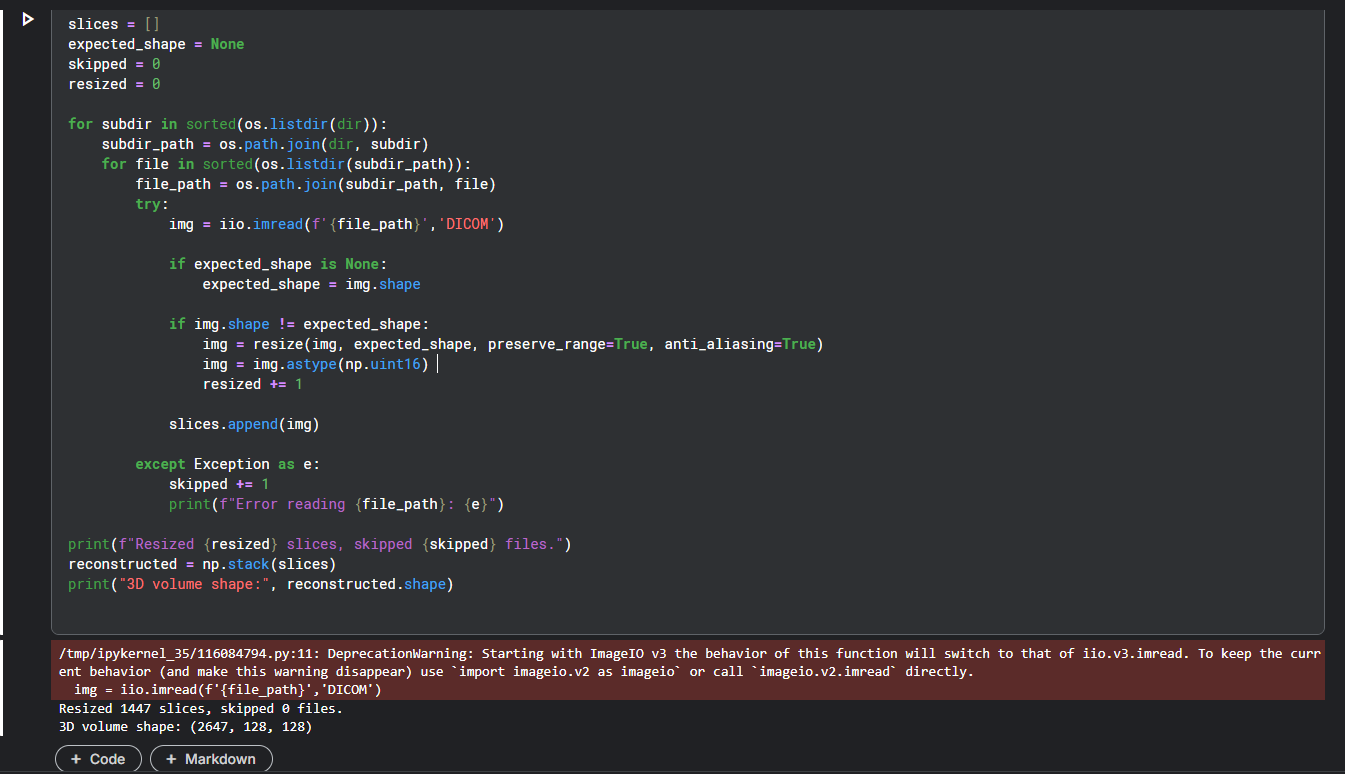

The approach for this question is explained as:

1.   In the dataset chosen, the files for the scans of a particular patient are already well structured and numbered properly. Hence, instead of using metadata, we will just use python's lexicographical sort to arrange the sorts in a sequential order and then sort them. This is done after inspecting the dataset thoroughly. It was observed that the data when sorted in lexicographical order, has the data in sequence for reconstructing the 3D volume appropriately.
2.   Actual implementation is pretty straightforward using numpy and pythons inbuilt os library.
3.   First make an array of the subdirectories in the given directory and make an empty slice array to append the slices to. Use simple loops and python tricks to construct file paths and append the slices to the empty slice array.
4.   Resize wherever required and finally use `np.stack()` to convert it into the required 3D array and hence obtain the required reconstructed volume.






In [ ]:
dir = 'path to directory here'
subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]

In [ ]:
slices = []
expected_shape = None
skipped = 0
resized = 0

for subdir in sorted(os.listdir(dir)):
    subdir_path = os.path.join(dir, subdir)
    for file in sorted(os.listdir(subdir_path)):
        file_path = os.path.join(subdir_path, file)
        try:
            img = iio.imread(f'{file_path}','DICOM')

            if expected_shape is None:
                expected_shape = img.shape

            if img.shape != expected_shape:
                img = resize(img, expected_shape, preserve_range=True, anti_aliasing=True)
                img = img.astype(np.uint16)
                resized += 1

            slices.append(img)

        except Exception as e:
            skipped += 1
            print(f"Error reading {file_path}: {e}")

print(f"Resized {resized} slices, skipped {skipped} files.")
reconstructed = np.stack(slices)
print("3D volume shape:", reconstructed.shape)

# Answer 4:

General visualisation + Visualising in different planes



1.   The first two scans, plotted using the `plotscan()` function are in the **TRANSVERSE/AXIAL PLANE.**
2.   The second plot, is in the **SAGGITAL PLANE**.
3.   The third plot is in the **FRONTAL/CORONAL PLANE.**



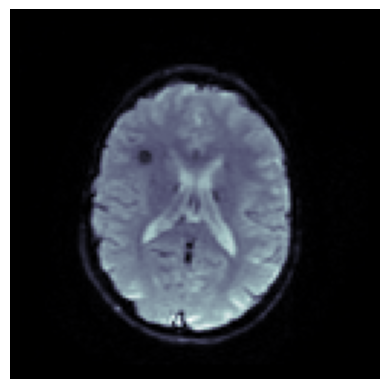

In [ ]:
plotscan(dcm_1array)

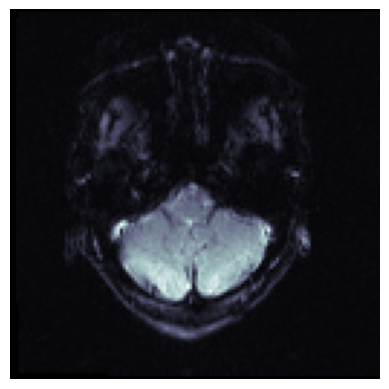

In [ ]:
plotscan(dcm_2)

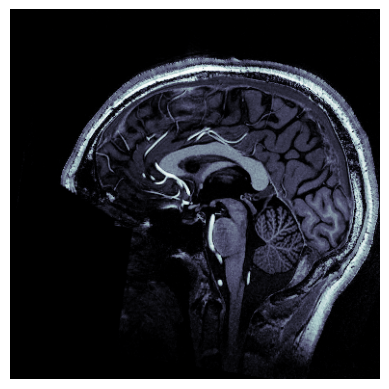

In [ ]:
plt.imshow(ndi.rotate(np.fliplr(data[int(data.shape[0]/2),:,:]),-90),cmap='bone')
plt.axis('off')
plt.show()

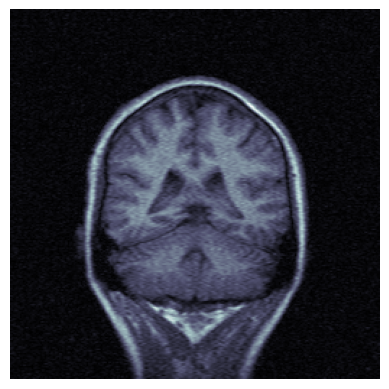

In [37]:
plotscan(dcm_3)

# Answer 5:

The affine matrix used in NII files is essentially a linear transformation that is used to map the voxel indices to real world indices.

$\begin{bmatrix} x & y & z & 1 \end{bmatrix} = \begin{bmatrix} i & j & k & 1 \end{bmatrix} \cdot \text{Affine}^\top$


As for the orientation tags in DCM files, it is explained below:                 

This basically works by levaraging principles of vector algebra and using meta data from the DCM file to construct the real world position $(x,y,z)$ of a voxel located at $(i,j,k)$, where,

$i$ : Index along the row

$j$ : Index along column

$k$ : Depth (Slice Index)


As can be seen in the cell run above this text box, the Image Orientation is returning a 6 dimensional vector which can be broken up into two 3 dimensional vectors. These two vectors are the row and column direction cosines of the images, lets call them $\vec{R}$ and $\vec{C}$. These are unit vectors.

Also in the above cell, is another important 3D vector called image position, this tells us the position of the leftmost (top left) voxel, we will denoted it by $\vec{P}_0$. This can be thought of as the vector required to account for origin shift when we are constructing the final formula for the mapping.

Naturally, we can see that we have two linearly independent directions, $\vec{R}$ and $\vec{C}$ but we need another one to successfully map the three dimensions, hence a natural choice would be along a vector $\vec{S}$ defined by $\vec{S} = \vec{R} \times \vec{C}$.

OK. So we have the indices and we have the directions, the only thing left is a 'scale' factor, which can also be obtained from the metadata of the DCM file, i.e., we will use the pixel spacing and voxel depth as scale factors or 'how many boxes to jump' each time we wish to map to a real world position. These are defined by the parameters

$\Delta_i$ : Pixel spacing along the row

$\Delta_j$ : Pixel spacing along the column

$\Delta_k$ : Voxel depth

Considering everything above, the real world position $\vec{P}$ becomes:

$\vec{P}_{xyz} = \vec{P}_0 + i \cdot \vec{R} \, \Delta_i + j \cdot \vec{C} \, \Delta_j + k \cdot \vec{S} \, \Delta_k$



As evident, the affine matrix for NII files is much simple and shorter method as it involves a simple matrix multiplication whereas doing the same for DCM files involves invoking principles of vector algebra and computing vector sums to find the final map.


In [ ]:
dcm_2.meta['ImagePositionPatient']

(-120.228, -85.6125, -55.6106)

In [ ]:
dcm_2.meta['ImageOrientationPatient']

(0.99671, -0.0467506, 0.066216, 0.0428201, 0.997305, 0.0595824)

# **Answer 6:**

| **Aspect**           | **DICOM**                                             | **NIfTI**                                      |
|----------------------|--------------------------------------------------------|------------------------------------------------|
| **Intended Use**     | Clinical and medical imaging                          | Research and neuroimaging (especially MRI) |
| **Metadata**         | Rich (standardized DICOM tags)          | Simplified, flat header with key fields         |
| **File Format**      | Multiple files (one per image slice)                  | Single file (`.nii`) or compressed (`.nii.gz`)  |
| **Python Tooling**   | More complex (`pydicom`)               | Easier (`nibabel`)              |
